# Introduction To Pandas

Pandas is a python library used for data analysis. It Provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. And it also has a user friendly API.

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional) handle the vast majority of typical use cases in sciences, finance, and a couple of areas of engineering. I will write a later article explaining why more than one data structure is needed in pandas but for now, let's get on with the flow.

This article focuses on introducing you to the essential attributes and methods Pandas possesses and how to use them.

List of topics:
1. Data Structures
2. Viewing data
3. Converting a Pandas DataFrame to a Numpy Array
4. Summary Statitics
5. Transposing and Sorting
6. Pandas Data Access Methods:
   1. Selecting
   2. Setting
7. Getting data
8. Boolean indexing
9. Handling missing data

In [1]:
# import the required packages

import numpy as np
import pandas as pd

## Data Structures

pandas has two data structures namely:
1. Series
2. DataFrame

Essentially, we can think of a Series can be considered to be a 1-dimensional container for scalers. And a DataFrame as a multi-dimensional container that holds a Series.

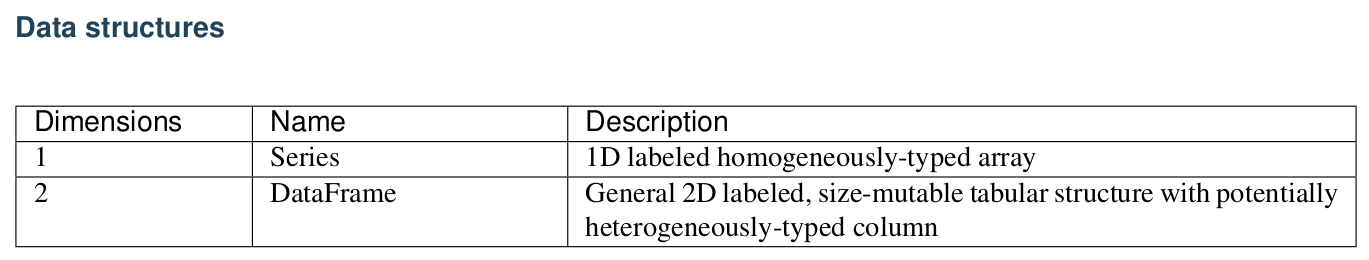

Let us create a Series and a DataFrame in the following cells.

In [2]:
# To create a series:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

As shown above, a Pandas Series is created by passing a list of values to the *Series()* method and allowing Pandas to automatically create a default index integer.

Now let's create a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
# creating a Pandas DataFrame

# Firstly, we create DateTimeIndex

dates = pd.date_range("20201130", periods=10)

dates

# Secondly, we pass a NumPy array

df = pd.DataFrame(np.random.rand(10, 10), index=dates, columns=list('ABCDEFGHIJ'))
df

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961
2020-12-03,0.014184,0.701355,0.164139,0.999597,0.359710,0.635610,0.266165,0.851843,0.928550,0.448455
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,0.089283,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,0.959219,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,0.851911,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744


The above cell creates a DataFrame having 10 rows and 10 columns with an index having the dates object and column names "ABCDEFGHIJ".

We can also create a DataFrame using dictionaries in python. This is done by passing a dictionary of objects that can be converted to series-like.

In [4]:
# We can also create a DataFrame
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp("20201130"),
                    'C': pd.Series(1, index = list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["predict", "score", "predict", "score"]),
                    'F': 'I am Chief'

                   })

In [5]:
# View the data types of the DataFrame
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

Pandas has two methods used to view the rows of a datasets:
1. head(): This returns the first 5 rows of your dataset by default, but passing an argument to it returns a specified number of rows.
2. tail(): This returns the last 5 rows of your dataset by default, but passing an argument to it returns a specified number of rows.

And two attributes used to view the index and columns of a dataset:
1. index: This returns the indexes of your dataset.
2. column: This returns the columns of your dataset.

These are helpful when you want to have a quick understanding of your dataset.


Let us see how they work in the following cells.

In [6]:
# return the first rows 
df.head()

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961
2020-12-03,0.014184,0.701355,0.164139,0.999597,0.359710,0.635610,0.266165,0.851843,0.928550,0.448455
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,0.089283,0.615571,0.133861,0.326627,0.136473


In [7]:
# To return the first 3 rows
df.head(3)

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961


In [8]:
# return the last 5 rows
df.tail()

,A,B,C,D,E,F,G,H,I,J
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,0.959219,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,0.851911,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744


In [9]:
# return the last 3 rows
df.tail(3)

,A,B,C,D,E,F,G,H,I,J
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744


To view the index and columns:

In [10]:
# view the index
df.index

DatetimeIndex(['2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
               '2020-12-08', '2020-12-09'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# view the columns
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

## Converting a Pandas DataFrame to a Numpy Array

You might presented with a problem which requires you to make numerical computations on the columns of your DataFrame by converting it to a NumPy Array. Pandas provides you with the method "to_numpy()" which gives a Numpy representation of the elemental data. There might be challenges when your DataFrame has columns with multiple data types, as **NumPy arrays have one data type for an entire array and pandas DataFranes have different data types accross all columns**. This data type may end up being *object*, which requires assigning every value to a
Python object.

When you invoke the ".to_numpy()" method, pandas will find the equivalent NumPy data type that can hold all the DataTypes in the DataFrame. An illustration follows:



In [12]:
df.to_numpy()

array([[0.99150003, 0.49135307, 0.03380783, 0.48763075, 0.62770825,
        0.58387321, 0.03338945, 0.97936681, 0.85698687, 0.8267414 ],
       [0.28304004, 0.84857968, 0.83649016, 0.22871938, 0.19028442,
        0.87215858, 0.71279809, 0.58862628, 0.06004208, 0.60399366],
       [0.11332247, 0.84622716, 0.66185546, 0.18724203, 0.67102581,
        0.38134034, 0.11507857, 0.93970324, 0.54279708, 0.05096111],
       [0.01418356, 0.70135512, 0.16413915, 0.99959695, 0.35970981,
        0.63560964, 0.26616549, 0.85184345, 0.92854994, 0.44845459],
       [0.90151691, 0.30958048, 0.19783511, 0.18554607, 0.72919992,
        0.08928339, 0.61557096, 0.13386066, 0.326627  , 0.13647322],
       [0.7031696 , 0.7534943 , 0.68908179, 0.66521122, 0.14633562,
        0.95921891, 0.85971978, 0.43621269, 0.90543858, 0.96470536],
       [0.984099  , 0.23725791, 0.86208403, 0.22900711, 0.40433937,
        0.85191091, 0.18190001, 0.50753887, 0.62040783, 0.27430585],
       [0.63858747, 0.59786552, 0.5274897

Note: DataFrame.to_numpy() is fast for the same data type accross all columns and doesn’t require copying.

In [13]:
df.to_numpy().dtype

dtype('float64')

For a DataFrame with multiple data types, DataFrame.to_numpy() is pretty costly 

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2020-11-30 00:00:00'), 1.0, 3, 'predict',
        'I am Chief'],
       [1.0, Timestamp('2020-11-30 00:00:00'), 1.0, 3, 'score',
        'I am Chief'],
       [1.0, Timestamp('2020-11-30 00:00:00'), 1.0, 3, 'predict',
        'I am Chief'],
       [1.0, Timestamp('2020-11-30 00:00:00'), 1.0, 3, 'score',
        'I am Chief']], dtype=object)

Note: DataFrame.to_numpy has no index attributes because the resulting data is a numpy array.

## Summary statistics

The *describe()* method provides a quick summary of the numerical data contained in your dataset.

In [15]:
df.describe()

,A,B,C,D,E,F,G,H,I,J
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.566578,0.544104,0.501256,0.469528,0.555131,0.559723,0.465791,0.636694,0.529587,0.549117
std,0.354029,0.235959,0.291304,0.264835,0.279352,0.278842,0.315045,0.288309,0.300658,0.314578
min,0.014184,0.237258,0.033808,0.185546,0.146336,0.089283,0.033389,0.133861,0.060042,0.050961
25%,0.305831,0.326572,0.245528,0.228791,0.370867,0.404895,0.202966,0.454044,0.335744,0.317843
50%,0.650373,0.544609,0.589329,0.515110,0.588360,0.531147,0.467076,0.660323,0.515695,0.590404
75%,0.851930,0.740460,0.682275,0.605875,0.714656,0.797836,0.688491,0.879880,0.797842,0.811992
max,0.991500,0.848580,0.862084,0.999597,0.955978,0.959219,0.939132,0.979367,0.928550,0.964705


In [16]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


## Transposing and sorting

You can transpose your DataFrame with:
* The **T** attriute

And sort by axes and values with:
* The **sort_index()** method
* The **sort_values()** method

In [17]:
# Transpose a DataFrame

df.T

,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09
A,0.991500,0.283040,0.113322,0.014184,0.901517,0.703170,0.984099,0.638587,0.374202,0.662159
B,0.491353,0.848580,0.846227,0.701355,0.309580,0.753494,0.237258,0.597866,0.325483,0.329841
C,0.033808,0.836490,0.661855,0.164139,0.197835,0.689082,0.862084,0.527490,0.388606,0.651169
D,0.487631,0.228719,0.187242,0.999597,0.185546,0.665211,0.229007,0.626880,0.542859,0.542589
E,0.627708,0.190284,0.671026,0.359710,0.729200,0.146336,0.404339,0.955978,0.917719,0.549012
F,0.583873,0.872159,0.381340,0.635610,0.089283,0.959219,0.851911,0.475559,0.269858,0.478422
G,0.033389,0.712798,0.115079,0.266165,0.615571,0.859720,0.181900,0.457451,0.476702,0.939132
H,0.979367,0.588626,0.939703,0.851843,0.133861,0.436213,0.507539,0.889225,0.308540,0.732020
I,0.856987,0.060042,0.542797,0.928550,0.326627,0.905439,0.620408,0.203332,0.488592,0.363096
J,0.826741,0.603994,0.050961,0.448455,0.136473,0.964705,0.274306,0.576814,0.840977,0.767744


View the transposed DataFrame

In [18]:
df

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961
2020-12-03,0.014184,0.701355,0.164139,0.999597,0.359710,0.635610,0.266165,0.851843,0.928550,0.448455
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,0.089283,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,0.959219,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,0.851911,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744


#### Sort by an axis
In pandas, rows and columns are known as **axis 0** and **axis 1** respectively.

In [19]:
# Sort by an axis
df.sort_index(axis=1, ascending=False)

,J,I,H,G,F,E,D,C,B,A
2020-11-30,0.826741,0.856987,0.979367,0.033389,0.583873,0.627708,0.487631,0.033808,0.491353,0.991500
2020-12-01,0.603994,0.060042,0.588626,0.712798,0.872159,0.190284,0.228719,0.836490,0.848580,0.283040
2020-12-02,0.050961,0.542797,0.939703,0.115079,0.381340,0.671026,0.187242,0.661855,0.846227,0.113322
2020-12-03,0.448455,0.928550,0.851843,0.266165,0.635610,0.359710,0.999597,0.164139,0.701355,0.014184
2020-12-04,0.136473,0.326627,0.133861,0.615571,0.089283,0.729200,0.185546,0.197835,0.309580,0.901517
2020-12-05,0.964705,0.905439,0.436213,0.859720,0.959219,0.146336,0.665211,0.689082,0.753494,0.703170
2020-12-06,0.274306,0.620408,0.507539,0.181900,0.851911,0.404339,0.229007,0.862084,0.237258,0.984099
2020-12-07,0.576814,0.203332,0.889225,0.457451,0.475559,0.955978,0.626880,0.527490,0.597866,0.638587
2020-12-08,0.840977,0.488592,0.308540,0.476702,0.269858,0.917719,0.542859,0.388606,0.325483,0.374202
2020-12-09,0.767744,0.363096,0.732020,0.939132,0.478422,0.549012,0.542589,0.651169,0.329841,0.662159


In [20]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E,F,G,H,I,J
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,0.851911,0.181900,0.507539,0.620408,0.274306
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,0.959219,0.859720,0.436213,0.905439,0.964705
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,0.089283,0.615571,0.133861,0.326627,0.136473
2020-12-03,0.014184,0.701355,0.164139,0.999597,0.359710,0.635610,0.266165,0.851843,0.928550,0.448455
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741


#### Sort by values

In [21]:
# to sort by values
df.sort_values(by='B')

,A,B,C,D,E,F,G,H,I,J
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,0.851911,0.181900,0.507539,0.620408,0.274306
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,0.089283,0.615571,0.133861,0.326627,0.136473
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-03,0.014184,0.701355,0.164139,0.999597,0.359710,0.635610,0.266165,0.851843,0.928550,0.448455
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,0.959219,0.859720,0.436213,0.905439,0.964705
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994


The above sorts the DataFrame based on the values of **column B**. By default, it is set to sort it in an ascending order but that can be changed by setting the argument **ascending = False**.

## Pandas Data Access Methods

These methods include:
* .at()
* .iat()
* .loc()
* .iloc()

Although, standard python/NumPy expressions for selecting and setting are intuitive and good for interactive work, working with Pandas data access methods is highly recommended because they are optimized for writing production code.

#### Selection by label

In [22]:
# For obtaining a cross-section using a label. 

df.loc[dates[0]]

A    0.991500
B    0.491353
C    0.033808
D    0.487631
E    0.627708
F    0.583873
G    0.033389
H    0.979367
I    0.856987
J    0.826741
Name: 2020-11-30 00:00:00, dtype: float64

#### selecting on multiple axes by label

In [23]:
df.loc[:, ['A', 'B']]

,A,B
2020-11-30,0.991500,0.491353
2020-12-01,0.283040,0.848580
2020-12-02,0.113322,0.846227
2020-12-03,0.014184,0.701355
2020-12-04,0.901517,0.309580
2020-12-05,0.703170,0.753494
2020-12-06,0.984099,0.237258
2020-12-07,0.638587,0.597866
2020-12-08,0.374202,0.325483
2020-12-09,0.662159,0.329841


Selecting with index and column names can be achieved like so:

In [24]:
df

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.991500,0.491353,0.033808,0.487631,0.627708,0.583873,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961
2020-12-03,0.014184,0.701355,0.164139,0.999597,0.359710,0.635610,0.266165,0.851843,0.928550,0.448455
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,0.089283,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,0.959219,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,0.851911,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,0.475559,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,0.269858,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,0.478422,0.939132,0.732020,0.363096,0.767744


In [25]:
df.loc['20201130':'20201201', ['A', 'B']]

,A,B
2020-11-30,0.99150,0.491353
2020-12-01,0.28304,0.848580


Reduction in the dimension of the returned object:

In [26]:
df.loc['20201130', ['A', 'B']]

A    0.991500
B    0.491353
Name: 2020-11-30 00:00:00, dtype: float64

A scaler value can be obtained by:

In [27]:
df.loc[dates[0], 'A']

0.9915000257518627

For getting fast access to a scaler (same as the method used above):

In [28]:
df.at[dates[0], 'A']

0.9915000257518627

#### Selection by position

Selection can be done via the position of the passed integers:

In [29]:
df.iloc[3]

A    0.014184
B    0.701355
C    0.164139
D    0.999597
E    0.359710
F    0.635610
G    0.266165
H    0.851843
I    0.928550
J    0.448455
Name: 2020-12-03 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [30]:
df.iloc[3:5, 0:2]

,A,B
2020-12-03,0.014184,0.701355
2020-12-04,0.901517,0.309580


By list of integer position locations, similar to numpy/python:

In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-12-01,0.283040,0.836490
2020-12-02,0.113322,0.661855
2020-12-04,0.901517,0.197835


For slicing rows explicitly

In [32]:
# This returns all the columns and rows 2 and 3
df.iloc[1:3, :]


,A,B,C,D,E,F,G,H,I,J
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,0.872159,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,0.381340,0.115079,0.939703,0.542797,0.050961


For slicing columns explicitly

In [33]:
# This returns all the rows and columns 2, 3 and 4
df.iloc[:, 1:4]

,B,C,D
2020-11-30,0.491353,0.033808,0.487631
2020-12-01,0.848580,0.836490,0.228719
2020-12-02,0.846227,0.661855,0.187242
2020-12-03,0.701355,0.164139,0.999597
2020-12-04,0.309580,0.197835,0.185546
2020-12-05,0.753494,0.689082,0.665211
2020-12-06,0.237258,0.862084,0.229007
2020-12-07,0.597866,0.527490,0.626880
2020-12-08,0.325483,0.388606,0.542859
2020-12-09,0.329841,0.651169,0.542589


For getting a value explicitly:

In [34]:
# This Returns the scaler value at row 1, col 1
df.iloc[1, 1]

0.8485796754858725

For fast access to a scaler

In [35]:
df.iat[1, 1]

0.8485796754858725

### Setting

Setting a new column automatically aligns the data by the indexes.

Let's create a Series with a date_range index to illustrate this:

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], index=pd.date_range('20201130', periods=10))

In [37]:
s1

2020-11-30     1
2020-12-01     2
2020-12-02     3
2020-12-03     4
2020-12-04     5
2020-12-05     6
2020-12-06     7
2020-12-07     8
2020-12-08     9
2020-12-09    10
Freq: D, dtype: int64

Pass the values of the above series to the 'F' column of our DataFrame object.

In [38]:
df['F'] = s1

setting values by label

This sets the value of the first row in column 'A' to zero.

In [39]:
df.at[dates[0], 'A'] = 0

Setting values by position

This sets the value of the first row in column 'B' to zero.

In [40]:
df.iat[0, 1] = 0

Setting by assigning a NumPy array

In [41]:
df.iloc[3] = np.array([5] * len(df))

View the changes made to our DataFrame object by the above setting operations.

In [42]:
df

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.000000,0.000000,0.033808,0.487631,0.627708,1,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,2,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,5,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,6,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,7,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,8,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,9,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,10,0.939132,0.732020,0.363096,0.767744


A *where* operation with setting.

In [43]:
df2 = df.copy()

df2

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.000000,0.000000,0.033808,0.487631,0.627708,1,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,2,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,5,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,6,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,7,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,8,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,9,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,10,0.939132,0.732020,0.363096,0.767744


In [44]:
df2[df2 < 0] = -df2

df2

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.000000,0.000000,0.033808,0.487631,0.627708,1,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,2,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,5,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,6,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,7,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,8,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,9,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,10,0.939132,0.732020,0.363096,0.767744


### Getting

To obtain a particular column in a DataFrame

In [45]:
# selecting a single column 
df['A']

2020-11-30    0.000000
2020-12-01    0.283040
2020-12-02    0.113322
2020-12-03    5.000000
2020-12-04    0.901517
2020-12-05    0.703170
2020-12-06    0.984099
2020-12-07    0.638587
2020-12-08    0.374202
2020-12-09    0.662159
Freq: D, Name: A, dtype: float64

In [46]:
# the above can be done with
df.A

2020-11-30    0.000000
2020-12-01    0.283040
2020-12-02    0.113322
2020-12-03    5.000000
2020-12-04    0.901517
2020-12-05    0.703170
2020-12-06    0.984099
2020-12-07    0.638587
2020-12-08    0.374202
2020-12-09    0.662159
Freq: D, Name: A, dtype: float64

### Boolean Indexing

Using a single column's values to select data:

In [47]:
df[df['A'] > 0]

,A,B,C,D,E,F,G,H,I,J
2020-12-01,0.283040,0.848580,0.836490,0.228719,0.190284,2,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000
2020-12-04,0.901517,0.309580,0.197835,0.185546,0.729200,5,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,0.146336,6,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,0.404339,7,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,8,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,0.917719,9,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,0.549012,10,0.939132,0.732020,0.363096,0.767744


Selecting values from a DataFrame where a boolean condition is met.

In [48]:
df[df > 0.5]

,A,B,C,D,E,F,G,H,I,J
2020-11-30,NaN,NaN,NaN,NaN,0.627708,1,NaN,0.979367,0.856987,0.826741
2020-12-01,NaN,0.848580,0.836490,NaN,NaN,2,0.712798,0.588626,NaN,0.603994
2020-12-02,NaN,0.846227,0.661855,NaN,0.671026,3,NaN,0.939703,0.542797,NaN
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000
2020-12-04,0.901517,NaN,NaN,NaN,0.729200,5,0.615571,NaN,NaN,NaN
2020-12-05,0.703170,0.753494,0.689082,0.665211,NaN,6,0.859720,NaN,0.905439,0.964705
2020-12-06,0.984099,NaN,0.862084,NaN,NaN,7,NaN,0.507539,0.620408,NaN
2020-12-07,0.638587,0.597866,0.527490,0.626880,0.955978,8,NaN,0.889225,NaN,0.576814
2020-12-08,NaN,NaN,NaN,0.542859,0.917719,9,NaN,NaN,NaN,0.840977
2020-12-09,0.662159,NaN,0.651169,0.542589,0.549012,10,0.939132,0.732020,NaN,0.767744


Using the isin() method for filtering:

In [49]:
df2 = df.copy()

df2['E'] = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
df2

,A,B,C,D,E,F,G,H,I,J
2020-11-30,0.000000,0.000000,0.033808,0.487631,one,1,0.033389,0.979367,0.856987,0.826741
2020-12-01,0.283040,0.848580,0.836490,0.228719,two,2,0.712798,0.588626,0.060042,0.603994
2020-12-02,0.113322,0.846227,0.661855,0.187242,three,3,0.115079,0.939703,0.542797,0.050961
2020-12-03,5.000000,5.000000,5.000000,5.000000,four,5,5.000000,5.000000,5.000000,5.000000
2020-12-04,0.901517,0.309580,0.197835,0.185546,five,5,0.615571,0.133861,0.326627,0.136473
2020-12-05,0.703170,0.753494,0.689082,0.665211,six,6,0.859720,0.436213,0.905439,0.964705
2020-12-06,0.984099,0.237258,0.862084,0.229007,seven,7,0.181900,0.507539,0.620408,0.274306
2020-12-07,0.638587,0.597866,0.527490,0.626880,eight,8,0.457451,0.889225,0.203332,0.576814
2020-12-08,0.374202,0.325483,0.388606,0.542859,nine,9,0.476702,0.308540,0.488592,0.840977
2020-12-09,0.662159,0.329841,0.651169,0.542589,ten,10,0.939132,0.732020,0.363096,0.767744


In [50]:
df2[df2['E'].isin(['two', 'five', 'ten'])]

,A,B,C,D,E,F,G,H,I,J
2020-12-01,0.283040,0.848580,0.836490,0.228719,two,2,0.712798,0.588626,0.060042,0.603994
2020-12-04,0.901517,0.309580,0.197835,0.185546,five,5,0.615571,0.133861,0.326627,0.136473
2020-12-09,0.662159,0.329841,0.651169,0.542589,ten,10,0.939132,0.732020,0.363096,0.767744


#### Handling Missing Data

Pandas primarily uses the value *np.nan* to represent missing data. It is by default not included in computations.

Reindexing allows you to modify the index on a specified axis. This returns a copy of the data.

In [58]:
df1 = df.reindex(index = dates[0:4], columns=list(df.columns) + ['E'])

In [59]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [60]:
df1

,A,B,C,D,E,F,G,H,I,J,E,F
2020-11-30,0.000000,0.000000,0.033808,0.487631,1.000000,1,0.033389,0.979367,0.856987,0.826741,1.000000,1
2020-12-01,0.283040,0.848580,0.836490,0.228719,1.000000,2,0.712798,0.588626,0.060042,0.603994,1.000000,2
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961,0.671026,3
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000,5.000000,5


In [54]:
df1.shape

(4, 11)

To get the boolean mask where values are *nan*

In [55]:
pd.isna(df1)

,A,B,C,D,E,F,G,H,I,J,E
2020-11-30,False,False,False,False,False,False,False,False,False,False,False
2020-12-01,False,False,False,False,False,False,False,False,False,False,False
2020-12-02,False,False,False,False,False,False,False,False,False,False,False
2020-12-03,False,False,False,False,False,False,False,False,False,False,False


Doesn't look like we have any missing data here 😋 But let's continue with the tutorial anyway 🤓

To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,E,F,G,H,I,J,E
2020-11-30,0.000000,0.000000,0.033808,0.487631,1.000000,1,0.033389,0.979367,0.856987,0.826741,1.000000
2020-12-01,0.283040,0.848580,0.836490,0.228719,1.000000,2,0.712798,0.588626,0.060042,0.603994,1.000000
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961,0.671026
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000,5.000000


Filling missing data

In [57]:
df1.fillna(value=9)

,A,B,C,D,E,F,G,H,I,J,E
2020-11-30,0.000000,0.000000,0.033808,0.487631,1.000000,1,0.033389,0.979367,0.856987,0.826741,1.000000
2020-12-01,0.283040,0.848580,0.836490,0.228719,1.000000,2,0.712798,0.588626,0.060042,0.603994,1.000000
2020-12-02,0.113322,0.846227,0.661855,0.187242,0.671026,3,0.115079,0.939703,0.542797,0.050961,0.671026
2020-12-03,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000,5.000000,5.000000
